In [55]:
import glob 
import random 
files = glob.glob('flow_split/*.csv')

f = random.choice(files)
f = open(f, 'r')

edges = set()
line = f.readline()
while line: 
    _,src,sp,dst,dp,_ = line.split(',')
    if int(sp) > int(dp):
        edges.add((src,dp,dst))
    else: 
        edges.add((dst,sp,src))
    line = f.readline()
    
f.close()

In [56]:
split_edges = set() 
for (s,p,d) in edges: 
    split_edges.add((s,p))
    split_edges.add((p,d))

print(split_edges)


{('SysClient0204.systemia.com', '389'), ('SysClient0364.systemia.com', '135'), ('SysClient0029.systemia.com', '139'), ('SysClient0453.systemia.com', '389'), ('SysClient0157.systemia.com', '389'), ('SysClient0265.systemia.com', '389'), ('SysClient0221.systemia.com', '135'), ('SysClient0318.systemia.com', '445'), ('SysClient0165.systemia.com', '445'), ('SysClient0209.systemia.com', '445'), ('SysClient0260.systemia.com', '445'), ('SysClient0210.systemia.com', '445'), ('SysClient0454.systemia.com', '445'), ('SysClient0057.systemia.com', '135'), ('SysClient0101.systemia.com', '139'), ('SysClient0070.systemia.com', '88'), ('SysClient0103.systemia.com', '88'), ('SysClient0053.systemia.com', '445'), ('SysClient0216.systemia.com', '135'), ('SysClient0110.systemia.com', '445'), ('SysClient0170.systemia.com', '445'), ('SysClient0258.systemia.com', '389'), ('SysClient0313.systemia.com', '389'), ('SysClient0074.systemia.com', '135'), ('SysClient0031.systemia.com', '139'), ('SysClient0207.systemia.c

730
142.20.61.135
142.20.61.131
192.168.35.15


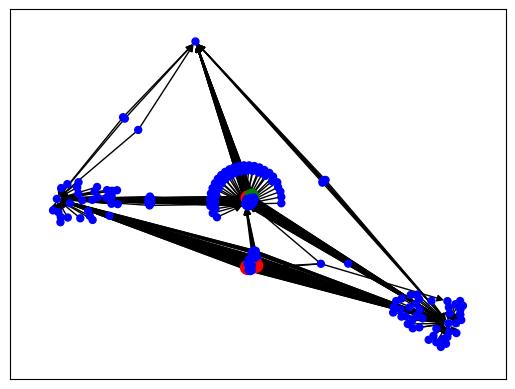

In [57]:
import networkx as nx
nodes = list(set([a[0] for a in edges]).union(set([a[2] for a in edges])))
g_edges = set([(a[0],a[2]) for a in edges])

print(len(edges))
labels = []
sizes = []
for n in nodes:
    if n.isnumeric():
        labels.append('green')
    else: 
        if n.startswith('Sys'):
            labels.append('blue')
            sizes.append(25)
        elif n == 'DC1': 
            labels.append('green')
            sizes.append(100)
        else: 
            labels.append('red')
            print(n)
            sizes.append(100)
    
g = nx.DiGraph(list(g_edges))
layout = nx.drawing.spring_layout(g, k=0.5, iterations=250)
nx.draw_networkx_nodes(g, layout, node_color=labels, node_size=sizes)
nx.draw_networkx_edges(g, layout, node_size=sizes)
pass 